In [38]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']= 100
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from scipy.interpolate import interp2d

In [39]:
from ipynb.fs.full.CamposMagneticos import interp_Bz, interp_Bx, interp_By # llamamos a los campos magnéticos

# Las distancias en los campos de Alberto están en cm.



$$ \text{SIMULACION CON 10 IMANES, CAMPO NO UNIFORME Y VARIAS ENERGIAS}$$

In [40]:
# Parámetros protón

m = 938.28 # MeV/c2
m_kg = 1.67E-27 # kg
q = 1.6E-19 # C
c = 299792458 # m/s 

-11.273749731895272
-4.729076501362025
-3.7369794213168155
-2.990927017754315
-2.532864460143489
-2.343025737121017
-2.039706716504729
-1.9622617947386525
-1.8577341428368395


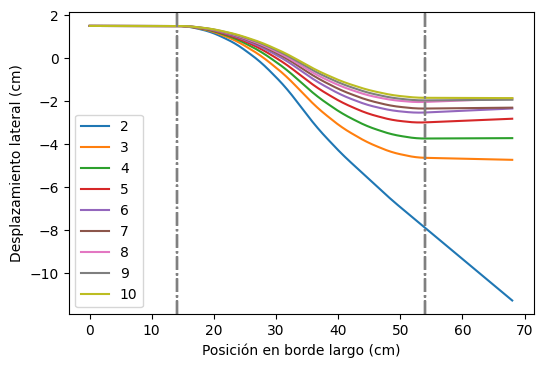

In [43]:
energies = np.arange(2,11,1) # distribución discreta de energías de los protones

# Posiciones relativas de los últimos cinco imanes en cm

x_rel_6=0
x_rel_7=1
x_rel_8=1
x_rel_9=3
x_rel_10=3


for i in range(len(energies)):
    
    v_p=c*np.sqrt(1-(1/(1 + energies[i]/m)**2)) # formula relativista para la velocidad

    x = 0.015  # parte del punto 1.5 cm. Estas distancias están en m.
    y = 0
    z = 0
    
    vx = 0
    vy = v_p  # incide con velocidad v_y, perpendicular al lado largo de los imanes
    vz = 0
    
    # Aquí nos vamos a guardar las posiciones en cada timestep:
    
    pos_x=[] 
    pos_y=[]
    pos_z=[]
    
    t = 0      # inicialización del tiempo
    dt = 1E-11 # timestep
    
    # Inicialización de los campos:
    
    Bx=0
    By=0
    Bz=0

    while y<0.14: #L_in. Aquí no hay campo magnético. El protón no se desvía.
        
        x = x + vx * dt  
        y = y + vy * dt 
        z = z + vz * dt

        pos_x.append(x)
        pos_y.append(y)
        pos_z.append(z)

        t += dt
        
    # Posición del protón en x justo antes de entrar al primer iman. La necesitaremos para la función de los campos:
        
    x_start_1=np.array(pos_x)[len(pos_x)-1] 
    
    ## PRIMER IMAN

    while y>=0.14 and y<=0.17:
    
        # Definimos posiciones para las funciones de los campos:

        x_B=100*(x_start_1+vx*dt) # renovamos el campo en cada timestep. Partimos de x_start_1.
        y_B=100*vy*dt+1 # lo mismo en y. Le sumamos 1 porque en la simulación de alberto el iman empieza en Y=1
        
        # Calculamos los campos en cada timestep:

        Bx = interp_Bx(x_B,y_B)[0] 
        By = interp_By(x_B,y_B)[0]
        Bz = interp_Bz(x_B,y_B)[0]

        # Fuerza de Lorentz en cada direccion, teniendo en cuenta la expresion analitica del prod. vectorial

        Fx = q*((vy*Bz)-(vz*By)) 
        Fy = q*((vz*Bx)-(vx*Bz)) 
        Fz = q*((vx*By)-(vy*Bx)) 

        # Actualizamos posiciones en t+dt

        x = x + vx * dt 
        y = y + vy * dt 
        z = z + vz * dt

        # Actualizamos velocidades en t+dt, teniendo en cuenta que la aceleración es F/m (igualar Lorentz a Newton)

        vx = vx + Fx/m_kg * dt
        vy = vy + Fy/m_kg * dt
        vz = vz + Fz/m_kg * dt

        # Nos guardamos las posiciones en las listas

        pos_x.append(x)
        pos_y.append(y)
        pos_z.append(z)

        t += dt
        
    while y>0.17 and y<0.18:

        x = x + vx * dt  
        y = y + vy * dt 
        z = z + vz * dt


        pos_x.append(x)
        pos_y.append(y)
        pos_z.append(z)

        t += dt
    
    x_start_2=np.array(pos_x)[len(pos_x)-1]
        
    ## SEGUNDO IMAN

    while y>=0.18 and y<=0.21:
    
        # Definimos campos:

        x_B=100*(x_start_2+vx*dt) 
        y_B=100*vy*dt+1

        Bx = interp_Bx(x_B,y_B)[0]
        By = interp_By(x_B,y_B)[0]
        Bz = interp_Bz(x_B,y_B)[0]

        # Fuerza de Lorentz en cada direccion, teniendo en cuenta la expresion analitica del prod. vectorial

        Fx = q*((vy*Bz)-(vz*By)) 
        Fy = q*((vz*Bx)-(vx*Bz)) 
        Fz = q*((vx*By)-(vy*Bx)) 

        # Actualizamos posiciones en t+dt

        x = x + vx * dt 
        y = y + vy * dt 
        z = z + vz * dt

        # Actualizamos velocidades en t+dt, teniendo en cuenta que la aceleración es F/m (igualar Lorentz a Newton)

        vx = vx + Fx/m_kg * dt
        vy = vy + Fy/m_kg * dt
        vz = vz + Fz/m_kg * dt

        # Nos guardamos las posiciones en las listas

        pos_x.append(x)
        pos_y.append(y)
        pos_z.append(z)

        t += dt

    while y>0.21 and y<0.22:

        x = x + vx * dt  
        y = y + vy * dt 
        z = z + vz * dt


        pos_x.append(x)
        pos_y.append(y)
        pos_z.append(z)

        t += dt
        
    x_start_3=np.array(pos_x)[len(pos_x)-1]
        
    ## TERCER IMAN
    while y>=0.22 and y<=0.25:

        # Definimos campos:

        x_B=100*(x_start_3+vx*dt)
        y_B=100*vy*dt+1


        Bx = interp_Bx(x_B,y_B)[0]
        By = interp_By(x_B,y_B)[0]
        Bz = interp_Bz(x_B,y_B)[0]

        # Fuerza de Lorentz en cada direccion, teniendo en cuenta la expresion analitica del prod. vectorial

        Fx = q*((vy*Bz)-(vz*By)) 
        Fy = q*((vz*Bx)-(vx*Bz)) 
        Fz = q*((vx*By)-(vy*Bx)) 

        # Actualizamos posiciones en t+dt

        x = x + vx * dt 
        y = y + vy * dt 
        z = z + vz * dt

        # Actualizamos velocidades en t+dt, teniendo en cuenta que la aceleración es F/m (igualar Lorentz a Newton)

        vx = vx + Fx/m_kg * dt
        vy = vy + Fy/m_kg * dt
        vz = vz + Fz/m_kg * dt

        # Nos guardamos las posiciones en las listas

        pos_x.append(x)
        pos_y.append(y)
        pos_z.append(z)

        t += dt

    while y>0.25 and y<0.26:

        x = x + vx * dt  
        y = y + vy * dt 
        z = z + vz * dt

        pos_x.append(x)
        pos_y.append(y)
        pos_z.append(z)

        t += dt
    
    x_start_4=np.array(pos_x)[len(pos_x)-1]

    ## CUARTO IMAN

    while y>=0.26 and y<=0.29:

        # Definimos campos:

        x_B=100*(x_start_4+vx*dt)
        y_B=100*vy*dt+1

        Bx = interp_Bx(x_B,y_B)[0]
        By = interp_By(x_B,y_B)[0]
        Bz = interp_Bz(x_B,y_B)[0]

        # Fuerza de Lorentz en cada direccion, teniendo en cuenta la expresion analitica del prod. vectorial

        Fx = q*((vy*Bz)-(vz*By)) 
        Fy = q*((vz*Bx)-(vx*Bz)) 
        Fz = q*((vx*By)-(vy*Bx)) 

        # Actualizamos posiciones en t+dt

        x = x + vx * dt 
        y = y + vy * dt 
        z = z + vz * dt

        # Actualizamos velocidades en t+dt, teniendo en cuenta que la aceleración es F/m (igualar Lorentz a Newton)

        vx = vx + Fx/m_kg * dt
        vy = vy + Fy/m_kg * dt
        vz = vz + Fz/m_kg * dt

        # Nos guardamos las posiciones en las listas

        pos_x.append(x)
        pos_y.append(y)
        pos_z.append(z)

        t += dt


    while y>0.29 and y<0.30:

        x = x + vx * dt  
        y = y + vy * dt 
        z = z + vz * dt

        pos_x.append(x)
        pos_y.append(y)
        pos_z.append(z)

        t += dt
    
    x_start_5=np.array(pos_x)[len(pos_x)-1]
        
    ## QUINTO IMAN

    while y>=0.30 and y<=0.33:

        # Definimos campos:

        x_B=100*(x_start_5+vx*dt)
        y_B=100*vy*dt+1

        Bx = interp_Bx(x_B,y_B)[0]
        By = interp_By(x_B,y_B)[0]
        Bz = interp_Bz(x_B,y_B)[0]

        # Fuerza de Lorentz en cada direccion, teniendo en cuenta la expresion analitica del prod. vectorial

        Fx = q*((vy*Bz)-(vz*By)) 
        Fy = q*((vz*Bx)-(vx*Bz)) 
        Fz = q*((vx*By)-(vy*Bx)) 

        # Actualizamos posiciones en t+dt

        x = x + vx * dt 
        y = y + vy * dt 
        z = z + vz * dt

        # Actualizamos velocidades en t+dt, teniendo en cuenta que la aceleración es F/m (igualar Lorentz a Newton)

        vx = vx + Fx/m_kg * dt
        vy = vy + Fy/m_kg * dt
        vz = vz + Fz/m_kg * dt

        # Nos guardamos las posiciones en las listas

        pos_x.append(x)
        pos_y.append(y)
        pos_z.append(z)

        t += dt


    while y>0.33 and y<0.35:

        x = x + vx * dt  
        y = y + vy * dt 
        z = z + vz * dt

        pos_x.append(x)
        pos_y.append(y)
        pos_z.append(z)

        t += dt
        
    x_start_6=np.array(pos_x)[len(pos_x)-1]
        
    ## INVERTIMOS CAMPO

    # SEXTO IMAN

    while y>=0.35 and y<=0.38:

        # Definimos campos:

        x_B=x_rel_6+100*(x_start_6+vx*dt) # en cm
        y_B=100*vy*dt+1

        Bx = interp_Bx(x_B,y_B)[0]
        By = interp_By(x_B,y_B)[0]
        Bz = interp_Bz(x_B,y_B)[0]

        # Fuerza de Lorentz en cada direccion, teniendo en cuenta la expresion analitica del prod. vectorial

        Fx = q*((vy*-Bz)-(vz*-By)) # INVERTIMOS CAMPOS
        Fy = q*((vz*-Bx)-(vx*-Bz)) 
        Fz = q*((vx*-By)-(vy*-Bx)) 

        # Actualizamos posiciones en t+dt

        x = x + vx * dt 
        y = y + vy * dt 
        z = z + vz * dt

        # Actualizamos velocidades en t+dt, teniendo en cuenta que la aceleración es F/m (igualar Lorentz a Newton)

        vx = vx + Fx/m_kg * dt
        vy = vy + Fy/m_kg * dt
        vz = vz + Fz/m_kg * dt

        # Nos guardamos las posiciones en las listas

        pos_x.append(x)
        pos_y.append(y)
        pos_z.append(z)

        t += dt


    while y>0.38 and y<0.39:

        x = x + vx * dt  
        y = y + vy * dt 
        z = z + vz * dt

        pos_x.append(x)
        pos_y.append(y)
        pos_z.append(z)

        t += dt
        
    x_start_7=np.array(pos_x)[len(pos_x)-1]
        
    # SEPTIMO IMAN

    while y>=0.39 and y<=0.42:

        # Definimos campos:

        x_B=x_rel_7+100*(x_start_7+vx*dt)
        y_B=100*vy*dt+1


        Bx = interp_Bx(x_B,y_B)[0]
        By = interp_By(x_B,y_B)[0]
        Bz = interp_Bz(x_B,y_B)[0]

        # Fuerza de Lorentz en cada direccion, teniendo en cuenta la expresion analitica del prod. vectorial

        Fx = q*((vy*-Bz)-(vz*-By)) # INVERTIMOS CAMPOS
        Fy = q*((vz*-Bx)-(vx*-Bz)) 
        Fz = q*((vx*-By)-(vy*-Bx)) 

        # Actualizamos posiciones en t+dt

        x = x + vx * dt 
        y = y + vy * dt 
        z = z + vz * dt

        # Actualizamos velocidades en t+dt, teniendo en cuenta que la aceleración es F/m (igualar Lorentz a Newton)

        vx = vx + Fx/m_kg * dt
        vy = vy + Fy/m_kg * dt
        vz = vz + Fz/m_kg * dt

        # Nos guardamos las posiciones en las listas

        pos_x.append(x)
        pos_y.append(y)
        pos_z.append(z)
        
        t += dt


    while y>0.42 and y<0.43:

        x = x + vx * dt  
        y = y + vy * dt 
        z = z + vz * dt

        pos_x.append(x)
        pos_y.append(y)
        pos_z.append(z)

        t += dt
        
    x_start_8=np.array(pos_x)[len(pos_x)-1]
        
    # OCTAVO IMAN

    while y>=0.43 and y<=0.46:

        # Definimos campos:

        x_B=x_rel_8+100*(x_start_8+vx*dt)
        y_B=100*vy*dt+1

        Bx = interp_Bx(x_B,y_B)[0]
        By = interp_By(x_B,y_B)[0]
        Bz = interp_Bz(x_B,y_B)[0]

        # Fuerza de Lorentz en cada direccion, teniendo en cuenta la expresion analitica del prod. vectorial

        Fx = q*((vy*-Bz)-(vz*-By)) # INVERTIMOS CAMPOS
        Fy = q*((vz*-Bx)-(vx*-Bz)) 
        Fz = q*((vx*-By)-(vy*-Bx)) 

        # Actualizamos posiciones en t+dt

        x = x + vx * dt 
        y = y + vy * dt 
        z = z + vz * dt

        # Actualizamos velocidades en t+dt, teniendo en cuenta que la aceleración es F/m (igualar Lorentz a Newton)

        vx = vx + Fx/m_kg * dt
        vy = vy + Fy/m_kg * dt
        vz = vz + Fz/m_kg * dt

        # Nos guardamos las posiciones en las listas

        pos_x.append(x)
        pos_y.append(y)
        pos_z.append(z)

        t += dt


    while y>0.46 and y<0.47:

        x = x + vx * dt  
        y = y + vy * dt 
        z = z + vz * dt

        pos_x.append(x)
        pos_y.append(y)
        pos_z.append(z)    

        t += dt
        
    x_start_9=np.array(pos_x)[len(pos_x)-1]

    # NOVENO IMAN

    while y>=0.47 and y<=0.50:

        # Definimos campos:

        x_B=x_rel_9+100*(x_start_9+vx*dt)
        y_B=100*vy*dt+1

        Bx = interp_Bx(x_B,y_B)[0]
        By = interp_By(x_B,y_B)[0]
        Bz = interp_Bz(x_B,y_B)[0]

        # Fuerza de Lorentz en cada direccion, teniendo en cuenta la expresion analitica del prod. vectorial

        Fx = q*((vy*-Bz)-(vz*-By)) # INVERTIMOS CAMPOS
        Fy = q*((vz*-Bx)-(vx*-Bz)) 
        Fz = q*((vx*-By)-(vy*-Bx)) 

        # Actualizamos posiciones en t+dt

        x = x + vx * dt 
        y = y + vy * dt 
        z = z + vz * dt

        # Actualizamos velocidades en t+dt, teniendo en cuenta que la aceleración es F/m (igualar Lorentz a Newton)

        vx = vx + Fx/m_kg * dt
        vy = vy + Fy/m_kg * dt
        vz = vz + Fz/m_kg * dt

        # Nos guardamos las posiciones en las listas

        pos_x.append(x)
        pos_y.append(y)
        pos_z.append(z)
   
        t += dt


    while y>0.50 and y<0.51:

        x = x + vx * dt  
        y = y + vy * dt 
        z = z + vz * dt

        pos_x.append(x)
        pos_y.append(y)
        pos_z.append(z)


        t += dt
        
    x_start_10=np.array(pos_x)[len(pos_x)-1]
        
    # DECIMO IMAN

    while y>=0.51 and y<=0.54:

        # Definimos campos:

        x_B=x_rel_10+100*(x_start_10+vx*dt)
        y_B=100*vy*dt+1

        Bx = interp_Bx(x_B,y_B)[0]
        By = interp_By(x_B,y_B)[0]
        Bz = interp_Bz(x_B,y_B)[0]

        # Fuerza de Lorentz en cada direccion, teniendo en cuenta la expresion analitica del prod. vectorial

        Fx = q*((vy*-Bz)-(vz*-By)) # INVERTIMOS CAMPOS
        Fy = q*((vz*-Bx)-(vx*-Bz)) 
        Fz = q*((vx*-By)-(vy*-Bx)) 

        # Actualizamos posiciones en t+dt

        x = x + vx * dt 
        y = y + vy * dt 
        z = z + vz * dt

        # Actualizamos velocidades en t+dt, teniendo en cuenta que la aceleración es F/m (igualar Lorentz a Newton)

        vx = vx + Fx/m_kg * dt
        vy = vy + Fy/m_kg * dt
        vz = vz + Fz/m_kg * dt

        # Nos guardamos las posiciones en las listas

        pos_x.append(x)
        pos_y.append(y)
        pos_z.append(z)

        t += dt
        
    x_start_11=np.array(pos_x)[len(pos_x)-1]


    while y>0.54 and y<=0.68:

        x = x + vx * dt  
        y = y + vy * dt 
        z = z + vz * dt

        pos_x.append(x)
        pos_y.append(y)
        pos_z.append(z)

        t += dt
        
    x_start_12=np.array(pos_x)[len(pos_x)-1]
    
    # Guardamos las posiciones en un array para trabajar mejor:
        
    pos_x_arr=np.array(pos_x) 
    pos_y_arr=np.array(pos_y)
    pos_z_arr=np.array(pos_z)
    
    
    print(np.min(pos_x_arr)*100) # desplazamientos laterales máximos, de 2 MeV a 10 MeV

    plt.plot(pos_y_arr*100,pos_x_arr*100,label=energies[i])
    plt.axvline(x=14,color='grey',linestyle='-.')
    plt.axvline(x=54,color='grey',linestyle='-.')
    plt.xlabel('Posición en borde largo (cm)')
    plt.ylabel('Desplazamiento lateral (cm)')
    plt.legend()
    #plt.grid()
    #plt.title('')

